In [18]:
%load_ext autoreload
%autoreload 2


In [2]:
from utils import validate_opening_stocks
import os


In [1]:
from data_loader import DataLoader

loader = DataLoader("data")
product_data = loader.load_product_data("AcerSwift")  # Replace with your product ID
print(product_data.keys())  # Should show: dict_keys(['policy', 'ledger', 'forecast', 'supplier'])

dict_keys(['policy', 'ledger', 'forecast', 'supplier'])


In [2]:
from datetime import date
from order_manager import OrderManager

# Test order placement
mgr = OrderManager(product_data['supplier'])
try:
    mgr.place_order(date(2025,4,1), 500)
    print("Pending orders:", mgr.get_pending_orders())
except Exception as e:
    print("Order failed:", str(e))

Pending orders: [{'arrival_date': Timestamp('2025-04-16 00:00:00'), 'quantity': 500, 'status': 'pending'}]


In [3]:
from data_loader import DataLoader
from order_manager import OrderManager
from datetime import date

# Initialize
loader = DataLoader("data")
product_data = loader.load_product_data("AcerSwift")
order_mgr = OrderManager(product_data['supplier'])

# Simulate 3 days
for day in [date(2025,4,1), date(2025,4,2), date(2025,4,3)]:
    try:
        order_mgr.place_order(day, 500)
    except:
        pass  # Handle failures
    
print("Final pending orders:")
print(order_mgr.get_pending_orders())

Final pending orders:
[{'arrival_date': Timestamp('2025-04-16 00:00:00'), 'quantity': 500, 'status': 'pending'}, {'arrival_date': Timestamp('2025-04-17 00:00:00'), 'quantity': 500, 'status': 'pending'}, {'arrival_date': Timestamp('2025-04-18 00:00:00'), 'quantity': 500, 'status': 'pending'}]


Metrics: {'total_holding_cost': 455.8, 'total_stockout_cost': 0.0, 'total_ordering_cost': 6854.61, 'stockout_days': 0}


<Axes: xlabel='date'>

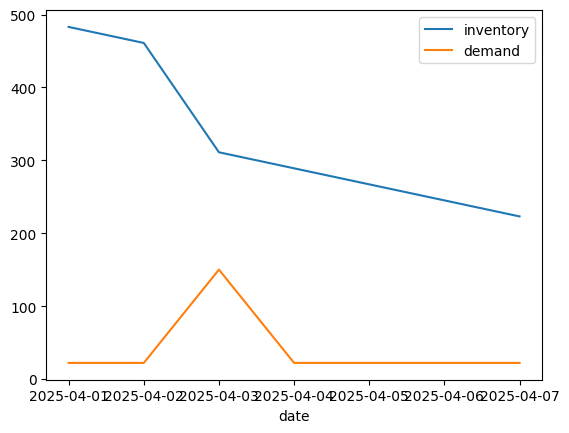

In [5]:
from core import InventorySimulator
from datetime import date

# Initialize simulator for AcerSwift
simulator = InventorySimulator("AcerSwift")

# Run simulation with modified demand
results = simulator.run(
    start_date=date(2025, 4, 1),
    end_date=date(2025, 4, 7),
    demand_modifications={
        date(2025, 4, 3): 150  # 3x normal demand
    }
)

# View results
print("Metrics:", results['metrics'])
results['timeline'].plot(y=['inventory', 'demand'], kind='line')

Metrics: {'total_holding_cost': 455.8, 'total_stockout_cost': 0.0, 'total_ordering_cost': 6854.61, 'stockout_days': 0}


<Axes: xlabel='date'>

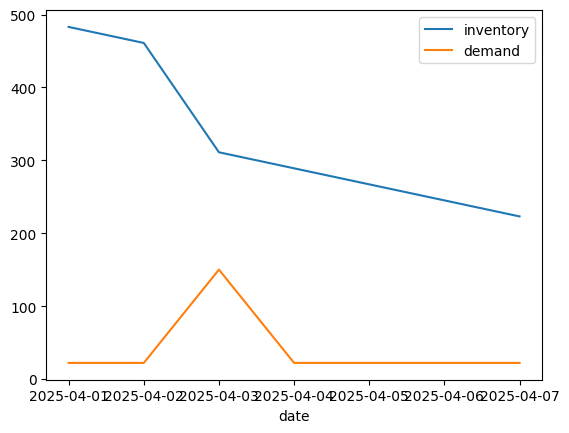

In [1]:
from core import InventorySimulator
from datetime import date

# Initialize simulator for AcerSwift
simulator = InventorySimulator("AcerSwift")

# Run simulation with modified demand
results = simulator.run(
    start_date=date(2025, 4, 1),
    end_date=date(2025, 4, 7),
    demand_modifications={
        date(2025, 4, 3): 150  # 3x normal demand
    }
)

# View results
print("Metrics:", results['metrics'])
results['timeline'].plot(y=['inventory', 'demand'], kind='line')

In [7]:
from simulator import run_simulation
results = run_simulation(
    product_id="AcerSwift",
    start_date="01-04-2025",  # 👈 this format works
    end_date="29-04-2025",
    demand_modifications={"10-04-2025": 300},
    enable_risk=True,
    holding_rate=0.25,
    force_supplier_id="Supplier_51"
)
